<a href="https://colab.research.google.com/github/francianerod/Projetos-SoulCode/blob/main/Projeto_Pandas_GCP_07_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Escola**: SoulCode Academy

**Curso:** Bootcamp Analista de Dados - Martech - AD1

**Data:** 07 de março de 2023

**Professor:** Igor Gondim

**Aluna:** Franciane Rodrigues

## **Atividade**

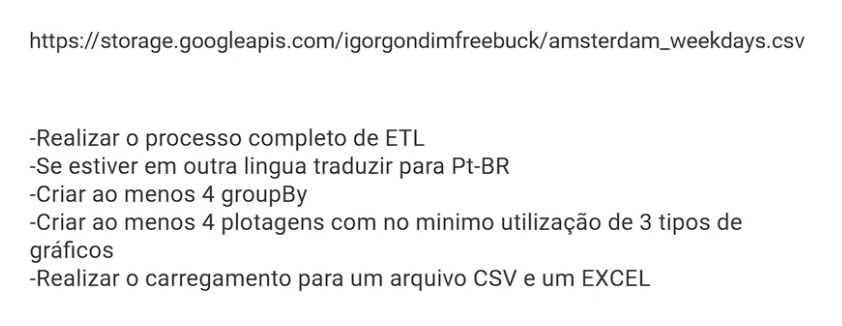

Link do arquivo: https://storage.googleapis.com/igorgondimfreebuck/amsterdam_weekdays.csv

## **Instalação de bibliotecas e importação de módulos**

In [ ]:
# instalação de pacote
!pip install gcsfs

In [ ]:
# Impotação de módulos
import pandas as pd
import numpy as np
import os
from google.cloud import storage

In [ ]:
# Config. do pandas
pd.set_option('display.max_columns', 100)

##**Conector para Cloud Storage(bucket)**

In [ ]:
# Configuração da chave de segurança para acesso ao bucket
serviceAccount = '/content/effective-pipe-377819-176980a04955.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Informações do arquivo do bucket a ser utilizado
# caminho do bucket: francianerodrigues01/brutos/amsterdam_weekdays.csv

client = storage.Client()
bucket = client.get_bucket('francianerodrigues01')
bucket.blob('amsterdam_weekdays.csv')
path = 'gs://francianerodrigues01/brutos/amsterdam_weekdays.csv'

## **Extração com Pandas e informações**

**Informações gerais do banco de dados:**

Este conjunto de dados contém dados de aluguel do Airbnb para várias cidades europeias, incluindo preço, tipo de quarto, status do anfitrião, comodidades e informações de localização. Esses dados podem ser usados para entender melhor os fatores que influenciam os preços de aluguel do Airbnb na Europa.

**Declaração das variáveis**

*   realSum: preço total 
*   room_type: tipo de quarto oferecido (privado/compartilhado/casa inteira/apt)
*   room_shared: se o quarto é compartilhado ou não
*   room_private: se o quarto é privativo ou não
*   person_capacity: número máximo de pessoas permitidas na propriedade
*   host_is_superhost: se o host é ou não um superhost
*   multi: tem vários quartos ou não
*   biz: seja para uso comercial ou familiar
*   cleanliness_rating: Classificação de limpeza
*   guest_satisfaction_overall: satisfação geral do hóspede
*   Ibedrooms: número de quartos
*   dist: a distância do centro da cidade
*   metro_dist: a distância da estação de metrô mais próxima
*   lng: Longitude
*   lat: Latitude

**Informações não inseridas no conjunto - possibilidade de retirada para análise**

*   Unnamed
*   attr_index
*   attr_index_norm
*   rest_index
*   rest_index_norm

Fonte: https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe

In [ ]:
# Extração da base de dados e guardar o backup da base de dados original como segurança
df = pd.read_csv(path)
dfback = df.copy()

## **Pré-Análise**

In [ ]:
# Informações da base de dados df
df.info()

## **Transformação**

In [ ]:
# Retirada de colunas irrelevantes
df.drop(['Unnamed: 0',
         'attr_index',
          'attr_index_norm',
          'rest_index',
          'rest_index_norm',
          ],
          axis = 1,
          inplace=True)

In [ ]:
# Colunas sem mudança de nomes e mostrando a retirada das colunas irrelevantes
df.info()

In [ ]:
# Mudando o nome das colunas 
df.rename(columns={'realSum': 'preco_total',
                   'room_type': 'tipo_quarto',
                   'room_shared':'compart_quarto',
                   'room_private': 'priv_quarto',
                   'person_capacity': 'capacidade',
                   'host_is_superhost': 'super_anfitriao',      
                   'multi': 'multi_quarto',
                   'biz': 'tipo_uso',
                   'cleanliness_rating': 'nota_limpeza',
                   'guest_satisfaction_overall': 'nota_satisfacao',
                   'bedrooms': 'n_quartos',
                   'dist': 'dist_cidade',
                   'metro_dist': 'dist_metro',
                   'lng': 'lon',
                   'lat': 'lat',
                   },
                   inplace = True)

In [ ]:
# Mostrando a mudança das colunas
df.info()

In [ ]:
# Ver categorias das colunas coluna categórica: única do tipo "object" do dataframe
sorted(pd.unique(df['tipo_quarto']))

**Traduzir categorias da colunas "tipo_quarto"**

*   'Entire home/apt': casa inteira/apto
*   'Private room' : quarto privado
*   'Shared room' : quarto compartilhado



In [ ]:
# Substituição de valor: tradução das categorias dentro das colunas

df.loc[df.tipo_quarto == 'Entire home/apt', ['tipo_quarto']] = 'casa inteira/apto'
df.loc[df.tipo_quarto == 'Private room',    ['tipo_quarto']] = 'quarto privado'
df.loc[df.tipo_quarto == 'Shared room',     ['tipo_quarto']] = 'quarto compartilhado'

# Imprima dataframe com as alterações
#df

## **Filtro**

In [ ]:
# Lembrar as colunas
df.dtypes

In [ ]:
# Passo1: Verificação de dados ausentes
# df.isna().sum()

In [ ]:
# Passo 2: Ver categorias da coluna traduzida
sorted(pd.unique(df['tipo_quarto']))

In [ ]:
# Passo 3: Filtragem sem detalhes com string

f1_tipoquarto = df.tipo_quarto == 'casa inteira/apto'
df.loc[f1_tipoquarto]

# Caso queira construir um dataset com esses dados, recomenda-se um novo dataset:
# df = df.loc[f1_tipoquarto]

In [ ]:
# Passo 4: Filtagrem com detalhes com string e dados númericos

f1 = df.tipo_quarto == 'casa inteira/apto'
f2 = df.nota_limpeza  >= 9.0
f3 = df.nota_satisfacao  >= 95.0
f4 = df.dist_metro <= 0.5
f5 = df.n_quartos <= 0

# Aplicação das condições de filtagrem
df.loc[f1 & f2 & f3 & f4 & f5]

## **GroupBy**

In [ ]:
# Observando as cinco primeiras posições do dataset
df.head()

In [ ]:
# Como essa base de dados não possui dados ausentes, o método "dropna" não será utilizado:

print(df.groupby(['preco_total']).size().sort_values(ascending=False))
print('\n----------------------------------------------------------------\n')

print(df.groupby(['tipo_quarto']).size().sort_values(ascending=False))
print('\n----------------------------------------------------------------\n')

print(df.groupby(['super_anfitriao']).size().sort_values(ascending=False))
print('\n----------------------------------------------------------------\n')

print(df.groupby(['n_quartos']).size().sort_values(ascending=False))
print('\n----------------------------------------------------------------\n')

print(df.groupby(['capacidade']).size().sort_values(ascending=False))
print('\n----------------------------------------------------------------\n')

print(df.groupby(['nota_satisfacao']).size().sort_values(ascending=False))
print('\n----------------------------------------------------------------\n')

print(df.groupby(['nota_limpeza']).size().sort_values(ascending=False))
print('\n----------------------------------------------------------------\n')


## **Visualização**

In [ ]:
# Gráfico de barras vertical
df.groupby(['capacidade'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(10,8),xlabel='Capacidade de pessoas',ylabel='Frequência de estadias')

In [ ]:
# Gráfico de barras horizontal
df.groupby(['n_quartos'],dropna=False).size().sort_values(ascending=False).plot.barh(figsize=(10,8))

In [ ]:
# Gráfico de setores sobre a quantidade de anfitriões e super anfitriões
# df.groupby(['super_anfitriao'],dropna=False).size().sort_values(ascending=False).plot.pie(figsize=(10, 5))
df.groupby(['super_anfitriao'],dropna=False).size().sort_values(ascending=False).plot(kind='pie', ylabel='Super anfitrião', figsize=(10, 5), autopct='%1.0f%%')

In [ ]:
df.groupby(['tipo_quarto'],dropna=False).size().sort_values(ascending=False).plot(kind='pie', ylabel= 'Tipo de Quarto', figsize=(10, 5), autopct='%1.0f%%')

In [ ]:
# Histograma de frequência
df.groupby(['nota_satisfacao'])['nota_satisfacao'].plot.hist(bins=10, ylabel= 'Nota de Satisfação', figsize=(10, 5))

## **Carregamento (Load)**

In [ ]:
# Carrgamento local
df.to_csv('airbnb_tratado', index=False)

In [ ]:
# Carrgamento local
df.to_excel('airbnb_tratado.xlsx', index=False)

In [ ]:
# Carrgamento no bucket
df.to_csv('gs://francianerodrigues01/tratados/airbnb_tratado.csv', index=False)

In [ ]:
# Carrgamento no bucket
df.to_excel('gs://francianerodrigues01/tratados/airbnb_tratado.xlsx', index=False)

## **Adicional: Análise Estatística Exploratória**

In [ ]:
# Análise estátistica básica do dataset
df.describe()

In [ ]:
# !pip install --upgrade pandas-profiling

In [ ]:
# from pandas_profiling import ProfileReport

In [ ]:
# Executa a função que gera o relatório
# relatorio = ProfileReport(df, title='Airbnb')
# relatorio.to_file(output_file="relatorio_parte1.html")